In [1]:
import pandas as pd
import statistics as stats
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
healthcare_data=pd.read_csv('healthcare_dataset.csv')

In [3]:
healthcare_data.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


In [4]:
healthcare_data.tail()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
4995,42,32.859689,174.0,140.0,107,248,90,1,High,10,9,High,High,No,Disease_B
4996,39,37.916078,113.0,184.0,180,200,98,1,High,8,5,High,Low,No,Disease_C
4997,48,32.637416,143.0,188.0,82,77,61,1,High,4,1,Medium,High,Yes,Disease_C
4998,34,31.794482,108.0,141.0,76,117,71,1,High,4,2,Low,Medium,No,NaN
4999,72,24.858529,82.0,219.0,136,203,64,1,High,4,0,Low,High,Yes,Disease_C


In [5]:
healthcare_data.shape

(5000, 15)

### Central Tendency Measures and Stats techniques
between line 6 to 65

In [6]:
healthcare_data.describe()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore
count,5000.000000,4750.000000,4750.000000,4750.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,27.332873,129.749053,199.611158,137.440600,146.573200,80.342000,0.510400,7.482200,4.485400
std,17.906991,7.190172,28.671508,58.173633,47.448072,82.623127,13.914919,0.499942,2.281562,2.852405
min,18.000000,15.000291,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,4.000000,0.000000
25%,34.000000,21.049709,105.000000,149.000000,103.000000,78.000000,70.000000,0.000000,5.000000,2.000000
50%,49.000000,27.218082,130.000000,201.000000,136.000000,144.000000,80.000000,1.000000,7.000000,4.000000
75%,64.000000,33.530189,155.000000,250.000000,167.000000,213.000000,89.000000,1.000000,9.000000,7.000000
max,79.000000,39.988943,179.000000,299.000000,582.000000,744.000000,198.000000,1.000000,11.000000,9.000000


In [7]:
healthcare_data.describe(include='all')

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
count,5000.000000,4750.000000,4750.000000,4750.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000,5000,5000,3742
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,3,3,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Low,Low,Yes,Disease_B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1748,NaN,NaN,1681,1696,2506,1258
mean,48.805600,27.332873,129.749053,199.611158,137.440600,146.573200,80.342000,0.510400,NaN,7.482200,4.485400,NaN,NaN,NaN,NaN
std,17.906991,7.190172,28.671508,58.173633,47.448072,82.623127,13.914919,0.499942,NaN,2.281562,2.852405,NaN,NaN,NaN,NaN
min,18.000000,15.000291,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN
25%,34.000000,21.049709,105.000000,149.000000,103.000000,78.000000,70.000000,0.000000,NaN,5.000000,2.000000,NaN,NaN,NaN,NaN
50%,49.000000,27.218082,130.000000,201.000000,136.000000,144.000000,80.000000,1.000000,NaN,7.000000,4.000000,NaN,NaN,NaN,NaN
75%,64.000000,33.530189,155.000000,250.000000,167.000000,213.000000,89.000000,1.000000,NaN,9.000000,7.000000,NaN,NaN,NaN,NaN


In [8]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  4750 non-null   float64
 2   BloodPressure        4750 non-null   float64
 3   Cholesterol          4750 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   object 
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   object 
 12  StressLevel          5000 non-null   object 
 13  HealthIns            5000 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

## Cleaning Data

In [9]:
healthcare_data.isnull().values.any()

True

In [10]:
healthcare_data.isnull().sum()

Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

In [11]:
columns_with_nan = healthcare_data.columns[healthcare_data.isna().any()].tolist()
print(columns_with_nan)

['BMI', 'BloodPressure', 'Cholesterol', 'Disease']


### BMI

In [12]:
healthcare_data['BMI'].unique()

array([27.57709877, 26.23374355, 29.64661971, ..., 32.6374163 ,
       31.79448176, 24.85852866])

In [13]:
BMI_healthcare_data_mean = healthcare_data['BMI'].mean()
BMI_healthcare_data_mean

27.3328732952

In [14]:
healthcare_data['BMI'] = healthcare_data['BMI'].fillna(BMI_healthcare_data_mean)
healthcare_data['BMI']

0       27.577099
1       26.233744
2       29.646620
3       30.619597
4       16.794395
          ...    
4995    32.859689
4996    37.916078
4997    32.637416
4998    31.794482
4999    24.858529
Name: BMI, Length: 5000, dtype: float64

In [15]:
BMI_counts = healthcare_data['BMI'].value_counts()
BMI_counts

BMI
27.332873    250
27.577099      1
38.164635      1
31.660183      1
39.614397      1
            ... 
23.482632      1
16.550919      1
24.445980      1
39.233045      1
24.858529      1
Name: count, Length: 4751, dtype: int64

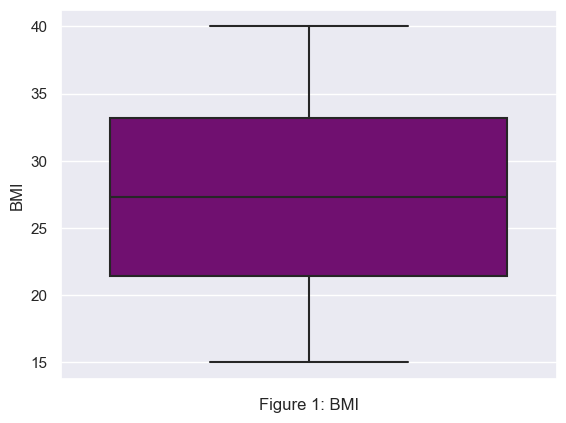

In [16]:
color = 'purple'
High_Value_Purchase_Count_outlier = healthcare_data['BMI']

sns.boxplot(y=High_Value_Purchase_Count_outlier, color=color)
plt.xlabel('Figure 1: BMI')

plt.show()

### BloodPressure

In [17]:
healthcare_data['BloodPressure'].unique()

array([ 88., 152., 106.,  96.,  nan, 124.,  87., 159.,  97., 112.,  80.,
       155.,  85., 120., 134.,  84., 138., 128., 161., 144., 162., 133.,
       140.,  82., 104., 148., 119., 129., 174., 136.,  95., 117.,  86.,
       157., 132., 142., 168., 111., 101., 131., 143., 170.,  92., 151.,
       135.,  91., 178., 165., 108., 118., 179., 177., 125., 146.,  93.,
       102., 173.,  89., 156., 160., 166.,  81., 175., 122.,  83., 167.,
        98., 164., 145., 116., 158., 126., 115., 105., 110., 176., 150.,
       114.,  94., 172., 109., 154., 139., 153., 171., 169., 163., 147.,
       149., 130., 127., 107., 103., 123., 121., 141., 100.,  90.,  99.,
       113., 137.])

In [18]:
BloodPressure_healthcare_data_mean = healthcare_data['BloodPressure'].mean()
BloodPressure_healthcare_data_mean

129.74905263157893

In [19]:
healthcare_data['BloodPressure'] = healthcare_data['BloodPressure'].fillna(BloodPressure_healthcare_data_mean)
healthcare_data['BloodPressure']

0        88.0
1        88.0
2       152.0
3       106.0
4        96.0
        ...  
4995    174.0
4996    113.0
4997    143.0
4998    108.0
4999     82.0
Name: BloodPressure, Length: 5000, dtype: float64

In [20]:
BloodPressure_counts = healthcare_data['BloodPressure'].value_counts()
BloodPressure_counts

BloodPressure
129.749053    250
127.000000     67
159.000000     66
165.000000     65
92.000000      64
             ... 
137.000000     35
177.000000     34
90.000000      33
128.000000     31
154.000000     28
Name: count, Length: 101, dtype: int64

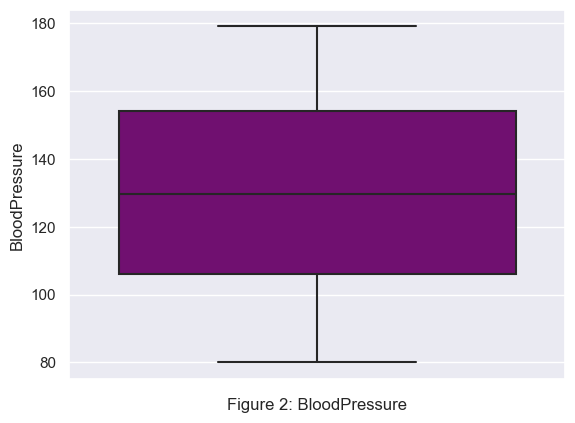

In [21]:
color = 'Purple'
High_Value_Purchase_Count_outlier = healthcare_data['BloodPressure']

sns.boxplot(y=High_Value_Purchase_Count_outlier, color=color)
plt.xlabel('Figure 2: BloodPressure')

plt.show()

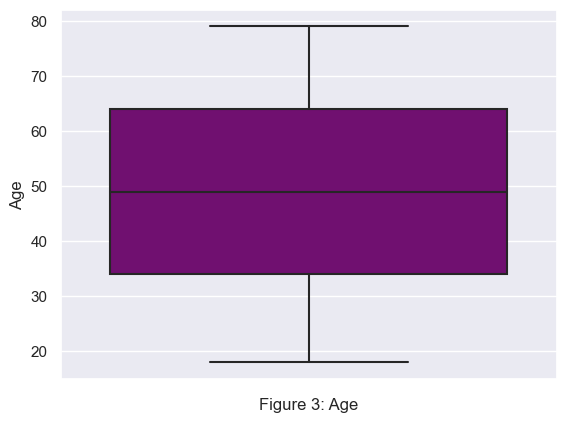

In [22]:
color = 'Purple'
High_Value_Purchase_Count_outlier = healthcare_data['Age']

sns.boxplot(y=High_Value_Purchase_Count_outlier, color=color)
plt.xlabel('Figure 3: Age')

plt.show()

In [23]:
healthcare_data['Cholesterol'].unique()

array([108., 252., 141., 273., 172., 183.,  nan, 120., 249., 256., 162.,
       160., 163., 168., 267., 228., 205., 164., 221., 161., 281., 202.,
       159., 145., 104., 212., 280., 169., 259., 110., 237., 266., 197.,
       130., 111., 207., 179., 265., 166., 293., 151., 232., 238., 124.,
       134., 262., 121., 264., 282., 195., 216., 291., 119., 103., 117.,
       150., 295., 236., 253., 201., 268., 158., 144., 140., 137., 118.,
       113., 226., 248., 242., 102., 136., 115., 241., 106., 233., 114.,
       279., 171., 261., 203., 214., 296., 247., 234., 149., 229., 146.,
       288., 217., 135., 178., 155., 116., 283., 245., 272., 157., 175.,
       109., 184., 230., 182., 208., 143., 297., 231., 192., 271., 219.,
       167., 165., 289., 257., 278., 187., 275., 132., 204., 173., 181.,
       246., 215., 186., 174., 112., 287., 299., 298., 101., 129., 176.,
       276., 213., 122., 196., 199., 154., 294., 107., 227., 131., 152.,
       209., 191., 255., 286., 277., 127., 270., 26

In [24]:
Cholesterol_healthcare_data_mean = healthcare_data['Cholesterol'].mean()
Cholesterol_healthcare_data_mean

199.61115789473683

In [25]:
healthcare_data['Cholesterol'] = healthcare_data['Cholesterol'].fillna(Cholesterol_healthcare_data_mean)
healthcare_data['Cholesterol']

0       108.0
1       252.0
2       141.0
3       273.0
4       172.0
        ...  
4995    140.0
4996    184.0
4997    188.0
4998    141.0
4999    219.0
Name: Cholesterol, Length: 5000, dtype: float64

In [26]:
Cholesterol_counts = healthcare_data['Cholesterol'].value_counts()
Cholesterol_counts

Cholesterol
199.611158    250
271.000000     39
114.000000     39
130.000000     36
211.000000     36
             ... 
239.000000     15
193.000000     15
238.000000     14
200.000000     13
110.000000      8
Name: count, Length: 201, dtype: int64

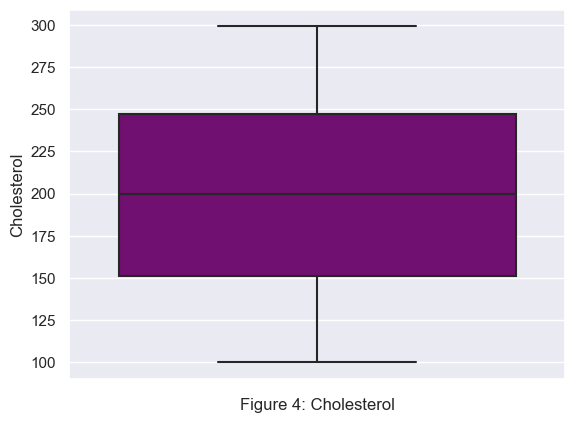

In [27]:
color = 'Purple'
High_Value_Purchase_Count_outlier = healthcare_data['Cholesterol']

sns.boxplot(y=High_Value_Purchase_Count_outlier, color=color)
plt.xlabel('Figure 4: Cholesterol')

plt.show()

In [28]:
healthcare_data['Disease'].unique()

array(['Disease_B', 'Disease_A', 'Disease_C', nan], dtype=object)

In [29]:
Disease_counts = healthcare_data['Disease'].value_counts()
Disease_counts

Disease
Disease_B    1258
Disease_A    1242
Disease_C    1242
Name: count, dtype: int64

In [30]:
healthcare_data['Disease'].fillna('Disease_Unknown', inplace=True)

In [31]:
Disease_counts = healthcare_data['Disease'].value_counts()
Disease_counts

Disease
Disease_B          1258
Disease_Unknown    1258
Disease_A          1242
Disease_C          1242
Name: count, dtype: int64

In [32]:
relative_frequencies_Disease = Disease_counts/len(healthcare_data)
relative_frequencies_Disease

Disease
Disease_B          0.2516
Disease_Unknown    0.2516
Disease_A          0.2484
Disease_C          0.2484
Name: count, dtype: float64

In [33]:
pd.DataFrame({'Disease': Disease_counts.index,
                        'Frequency': Disease_counts.values,
                        'Relative Frequency': relative_frequencies_Disease.values})

,Disease,Frequency,Relative Frequency
0,Disease_B,1258,0.2516
1,Disease_Unknown,1258,0.2516
2,Disease_A,1242,0.2484
3,Disease_C,1242,0.2484


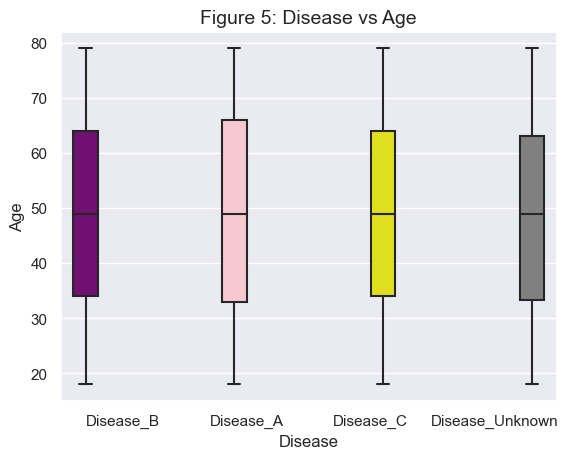

In [34]:
palette = ['purple', 'pink', 'yellow', 'grey']

sns.boxplot(x = 'Disease', y = 'Age', data = healthcare_data, hue = 'Disease', palette=palette)
plt.title('Figure 5: Disease vs Age', fontsize = 14)
plt.legend([], [],frameon = False)
plt.show()

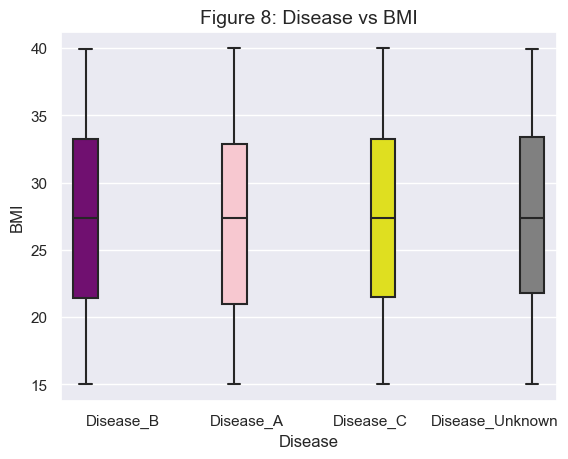

In [35]:
palette = ['purple', 'pink', 'yellow', 'grey']

sns.boxplot(x = 'Disease', y = 'BMI', data = healthcare_data, hue = 'Disease', palette=palette)
plt.title('Figure 8: Disease vs BMI', fontsize = 14)
plt.legend([], [],frameon = False)
plt.show()

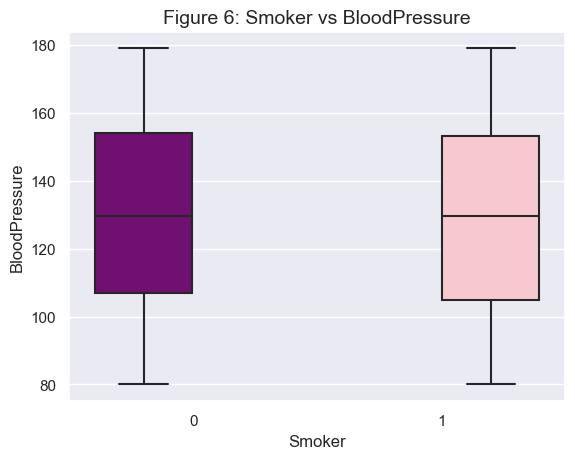

In [36]:
palette = ['purple', 'pink', 'yellow', 'grey']

sns.boxplot(x = 'Smoker', y = 'BloodPressure', data = healthcare_data, hue = 'Smoker', palette=palette)
plt.title('Figure 6: Smoker vs BloodPressure', fontsize = 14)
plt.legend([], [],frameon = False)
plt.show()

In [37]:
healthcare_data.describe(include='object')

,PhysicalActivity,IncomeLevel,StressLevel,HealthIns,Disease
count,5000,5000,5000,5000,5000
unique,3,3,3,2,4
top,Medium,Low,Low,Yes,Disease_B
freq,1748,1681,1696,2506,1258


### HealthIns

In [38]:
healthcare_data['HealthIns'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
HealthIns_counts = healthcare_data['HealthIns'].value_counts()
HealthIns_counts

HealthIns
Yes    2506
No     2494
Name: count, dtype: int64

In [40]:
relative_frequencies_HealthIns = HealthIns_counts/len(healthcare_data)
relative_frequencies_HealthIns

HealthIns
Yes    0.5012
No     0.4988
Name: count, dtype: float64

In [41]:
pd.DataFrame({'HealthIns': HealthIns_counts.index,
                        'Frequency': HealthIns_counts.values,
                        'Relative Frequency': relative_frequencies_HealthIns.values})

,HealthIns,Frequency,Relative Frequency
0,Yes,2506,0.5012
1,No,2494,0.4988


### PhysicalActivity

In [42]:
healthcare_data['PhysicalActivity'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [43]:
HealthIns_counts = healthcare_data['PhysicalActivity'].value_counts()
HealthIns_counts

PhysicalActivity
Medium    1748
High      1635
Low       1617
Name: count, dtype: int64

In [44]:
relative_frequencies_PhysicalActivity = HealthIns_counts/len(healthcare_data)
relative_frequencies_PhysicalActivity

PhysicalActivity
Medium    0.3496
High      0.3270
Low       0.3234
Name: count, dtype: float64

In [45]:
pd.DataFrame({'PhysicalActivity': HealthIns_counts.index,
                        'Frequency': HealthIns_counts.values,
                        'Relative Frequency': relative_frequencies_PhysicalActivity.values})

,PhysicalActivity,Frequency,Relative Frequency
0,Medium,1748,0.3496
1,High,1635,0.3270
2,Low,1617,0.3234


In [46]:
modes = healthcare_data.mode()
print(modes)

    Age        BMI  BloodPressure  Cholesterol  Glucose  Insulin  HeartRate  \
0  77.0  27.332873     129.749053   199.611158    117.0     51.0       89.0   
1   NaN        NaN            NaN          NaN      NaN      NaN        NaN   

   Smoker PhysicalActivity  SleepTime  MedicalHistoryScore IncomeLevel  \
0     1.0           Medium        5.0                  7.0         Low   
1     NaN              NaN        NaN                  NaN         NaN   

  StressLevel HealthIns          Disease  
0         Low       Yes        Disease_B  
1         NaN       NaN  Disease_Unknown  


In [47]:
def identify_variable_types(data):
    categorical_vars = []
    continuous_vars = []

    for var_name, var_data in data.items():
        # Check if the data type is string (categorical) or numeric (continuous)
        if isinstance(var_data[0], str):
            categorical_vars.append(var_name)
        else:
            continuous_vars.append(var_name)

    return categorical_vars, continuous_vars

data = {
    'Age': [25, 30, 45, 40, 50],
    'BMI': [22.5, 24.0, 28.1, 26.7, 30.2],
    'BloodPressure': [120, 125, 130, 128, 135],
    'Cholesterol': [200, 195, 210, 205, 215],
    'Glucose': [85, 90, 95, 100, 105],
    'Insulin': [15, 20, 25, 30, 35],
    'HeartRate': [70, 75, 80, 85, 90],
    'Smoker': ['Yes', 'No'],
    'PhysicalActivity': ['Low', 'Medium', 'High', 'Low', 'Medium'],
    'SleepTime': [7, 6, 8, 5, 6],
    'MedicalHistoryScore': [2, 3, 1, 4, 2],
    'IncomeLevel': ['High', 'Medium', 'Low', 'Medium', 'High'],
    'StressLevel': ['Low', 'Medium', 'High', 'Low', 'High'],
    'HealthIns': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Disease': ['Disease_A', 'Disease_B', 'Disease_C', 'Disease_Unknown']
}

categorical_vars, continuous_vars = identify_variable_types(data)
print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: ['Smoker', 'PhysicalActivity', 'IncomeLevel', 'StressLevel', 'HealthIns', 'Disease']
Continuous Variables: ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore']


In [48]:
object_features_names = healthcare_data.select_dtypes(include=['object']).columns.tolist()
object_features_names

['PhysicalActivity', 'IncomeLevel', 'StressLevel', 'HealthIns', 'Disease']

In [49]:
healthcare_data.PhysicalActivity = healthcare_data.PhysicalActivity.map({"Low": 0, "Medium":1, "High":2})
healthcare_data.IncomeLevel = healthcare_data.IncomeLevel.map({"Low": 0, "Medium":1, "High":2})
healthcare_data.StressLevel = healthcare_data.StressLevel.map({"Low": 0, "Medium":1, "High":2})
healthcare_data["HealthIns"] = healthcare_data["HealthIns"].map({"No":0,"Yes":1})

### Standardization / LabelEncoder before to do the models:

In [50]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding(dataframe, column_name):
 
    encoder = LabelEncoder()
    
    encoded_column = encoder.fit_transform(dataframe['Disease'])
    
    return encoded_column

In [51]:
encoded_disease = apply_label_encoding(healthcare_data, 'Disease')

healthcare_data['Disease_Encoded'] = encoded_disease

In [52]:
healthcare_data.drop(columns=['Disease'], inplace=True)

### OneHotEcoder:

In [53]:
healthcare_data.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease_Encoded
0,56,27.577099,88.0,108.0,92,171,75,0,1,9,5,2,0,0,1
1,69,26.233744,88.0,252.0,102,179,71,0,2,9,3,2,1,1,0
2,46,29.646620,152.0,141.0,89,198,90,1,0,5,5,1,1,0,2
3,32,30.619597,106.0,273.0,159,222,64,1,1,7,0,1,2,0,2
4,60,16.794395,96.0,172.0,173,30,99,1,0,7,3,2,1,0,1


In [54]:
from sklearn.preprocessing import OneHotEncoder

y_series = pd.Series(['A', 'B', 'C', 'Unknown'])

y_array = y_series.to_numpy()

encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y_array.reshape(-1, 1)) 

new_columns = encoder.get_feature_names_out(['Disease_Encoded'])

y_encoded_df = pd.DataFrame(y_encoded.toarray(), columns=new_columns)

y_new = y_encoded_df[new_columns]

print(y_new.head())

   Disease_Encoded_A  Disease_Encoded_B  Disease_Encoded_C  \
0                1.0                0.0                0.0   
1                0.0                1.0                0.0   
2                0.0                0.0                1.0   
3                0.0                0.0                0.0   

   Disease_Encoded_Unknown  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  


In [55]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  5000 non-null   float64
 2   BloodPressure        5000 non-null   float64
 3   Cholesterol          5000 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   int64  
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   int64  
 12  StressLevel          5000 non-null   int64  
 13  HealthIns            5000 non-null   int64  
 14  Disease_Encoded      5000 non-null   int32  
dtypes: float64(3), int32(1), int64(11)
mem

In [56]:
healthcare_data.describe()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease_Encoded
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,27.332873,129.749053,199.611158,137.440600,146.573200,80.342000,0.510400,1.003600,7.482200,4.485400,0.995800,0.986000,0.501200,1.503200
std,17.906991,7.008076,27.945382,56.700345,47.448072,82.623127,13.914919,0.499942,0.806546,2.281562,2.852405,0.817506,0.815069,0.500049,1.118141
min,18.000000,15.000291,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,21.398311,106.000000,151.000000,103.000000,78.000000,70.000000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,49.000000,27.332873,129.749053,199.611158,136.000000,144.000000,80.000000,1.000000,1.000000,7.000000,4.000000,1.000000,1.000000,1.000000,1.500000
75%,64.000000,33.181997,154.000000,247.000000,167.000000,213.000000,89.000000,1.000000,2.000000,9.000000,7.000000,2.000000,2.000000,1.000000,3.000000
max,79.000000,39.988943,179.000000,299.000000,582.000000,744.000000,198.000000,1.000000,2.000000,11.000000,9.000000,2.000000,2.000000,1.000000,3.000000


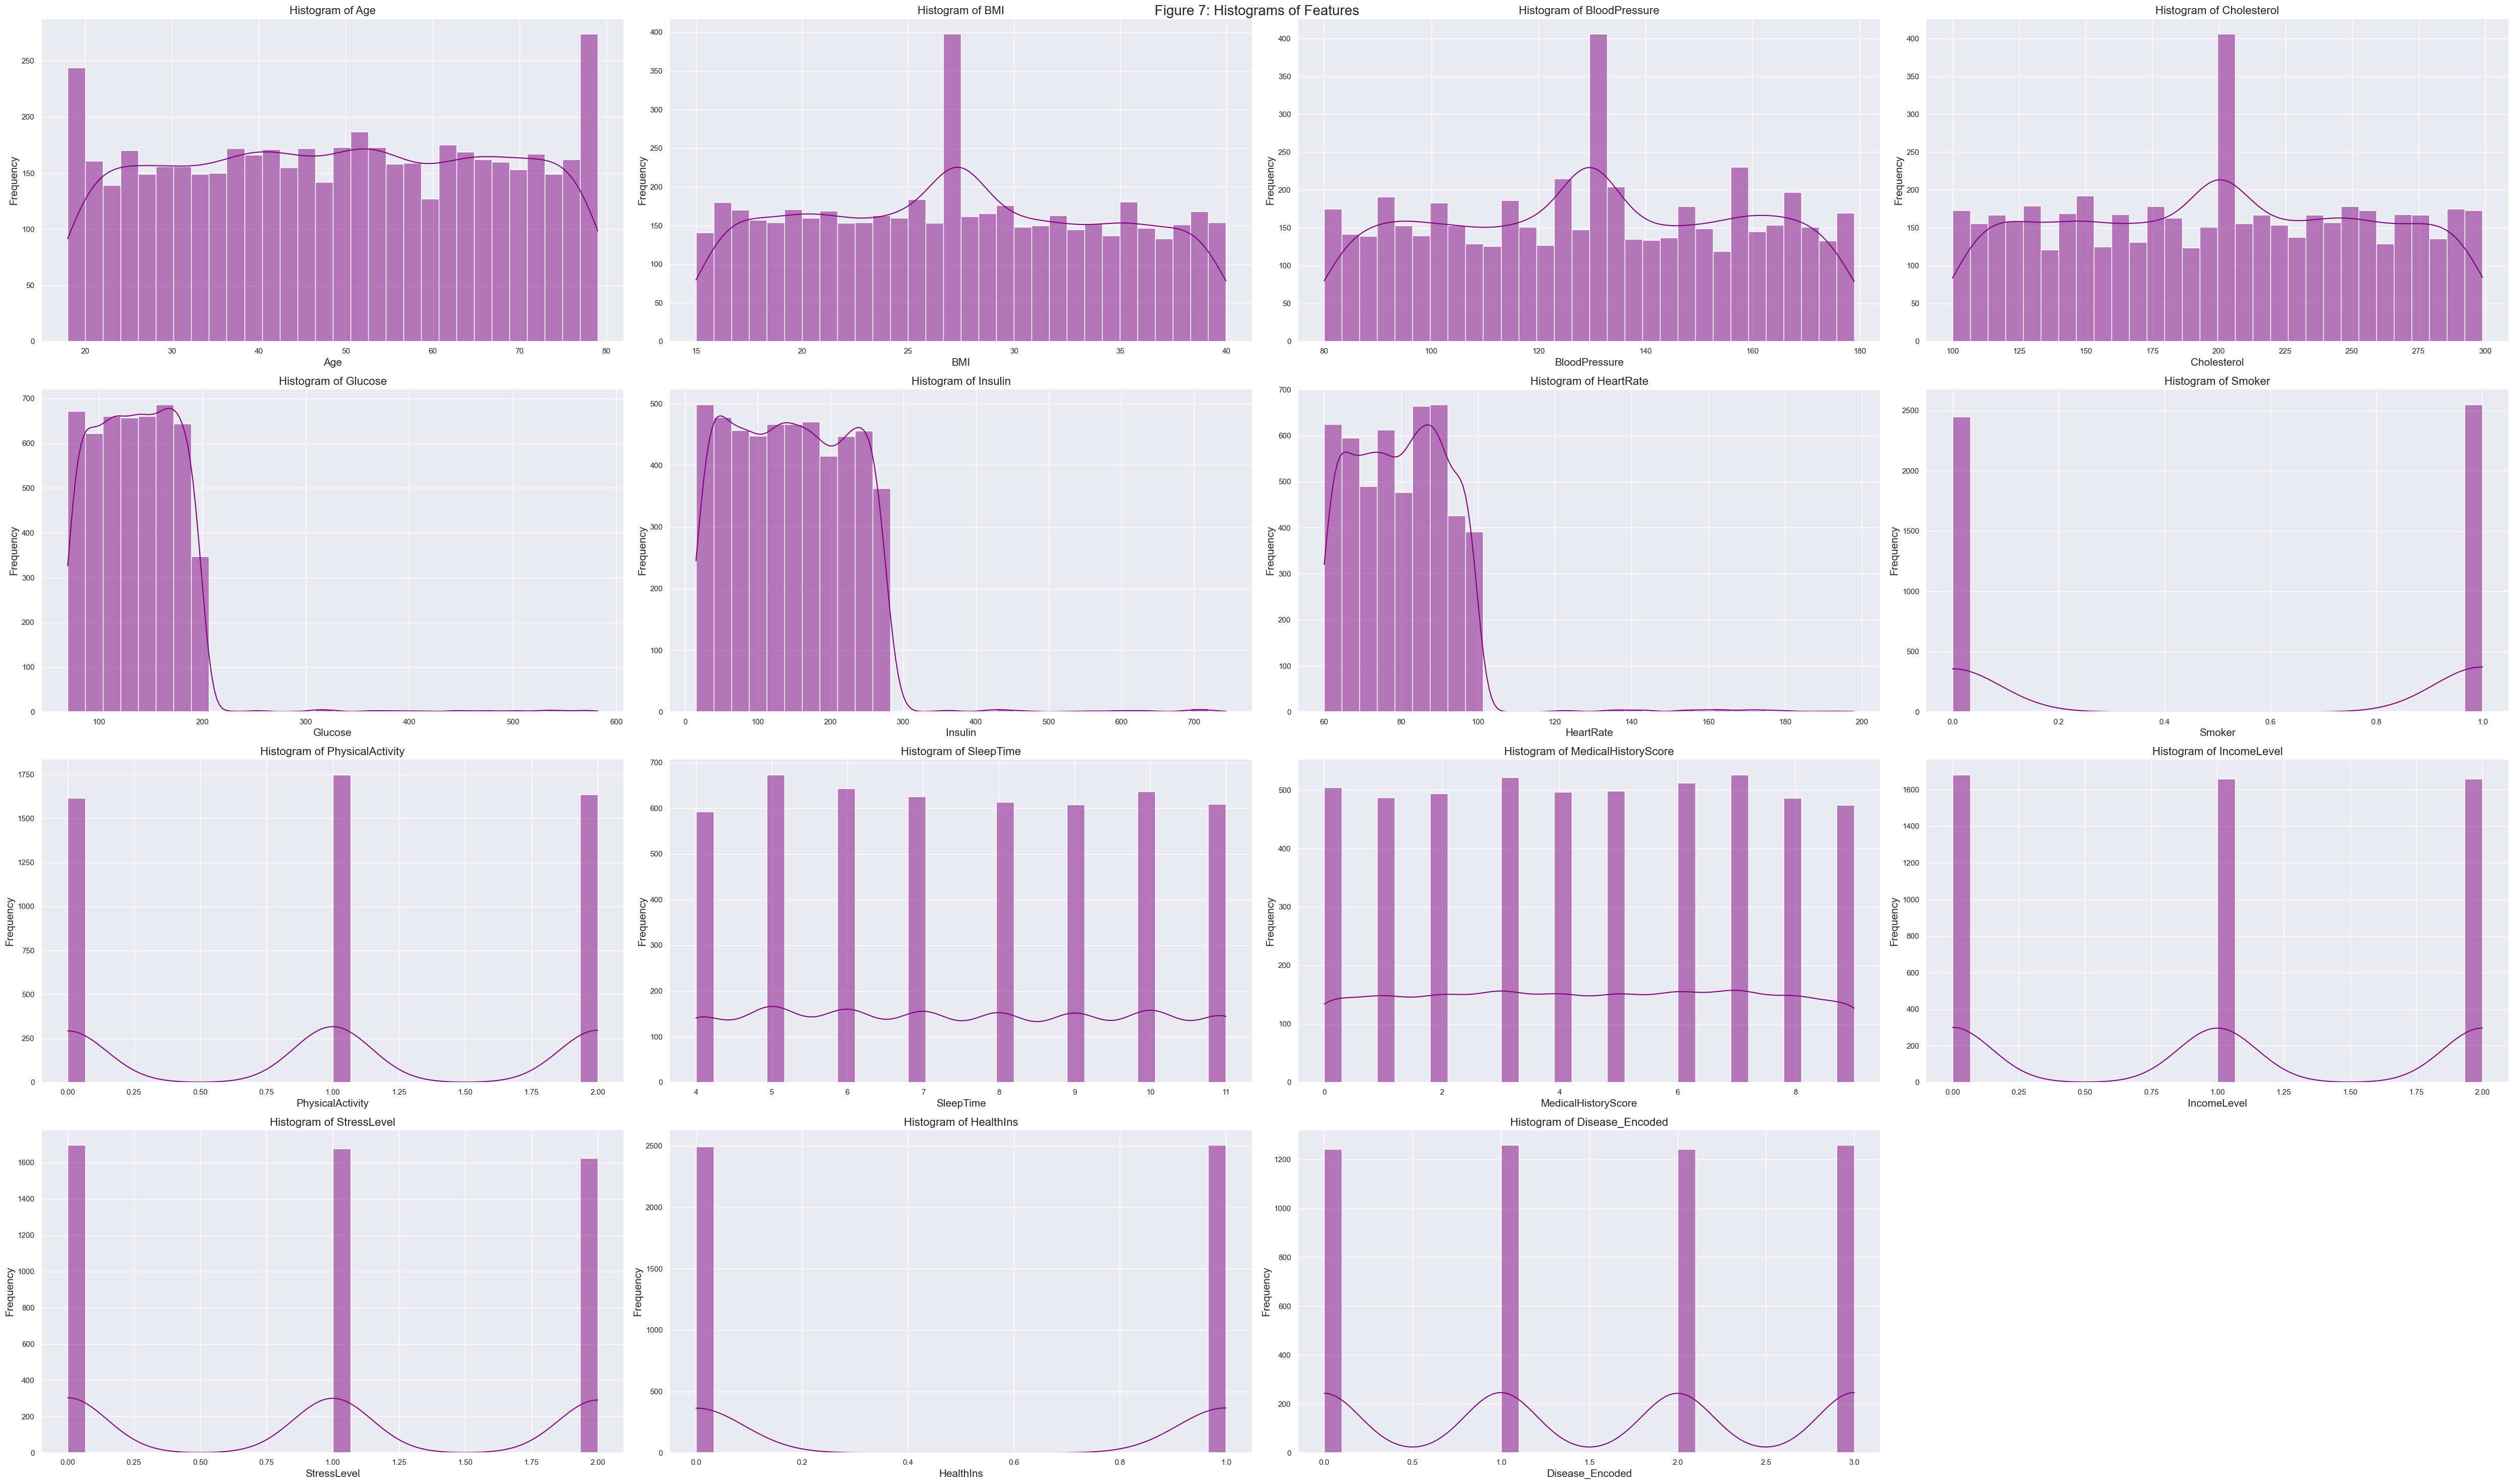

In [57]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

features = healthcare_data.columns.tolist()

num_features = len(features)
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(50, 30))  

axes = axes.flatten()

colors = ['purple'] 

for i, feature in enumerate(features):
    if i < num_features:  
        sns.histplot(healthcare_data[feature], kde=True, bins=30, color=colors[i % len(colors)], ax=axes[i])
        axes[i].set_title(f'Histogram of {feature}', fontsize=16)
        axes[i].set_xlabel(feature, fontsize=15)
        axes[i].set_ylabel('Frequency', fontsize=15)

for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.suptitle("Figure 7: Histograms of Features", fontsize=20)  

plt.tight_layout()

plt.show()

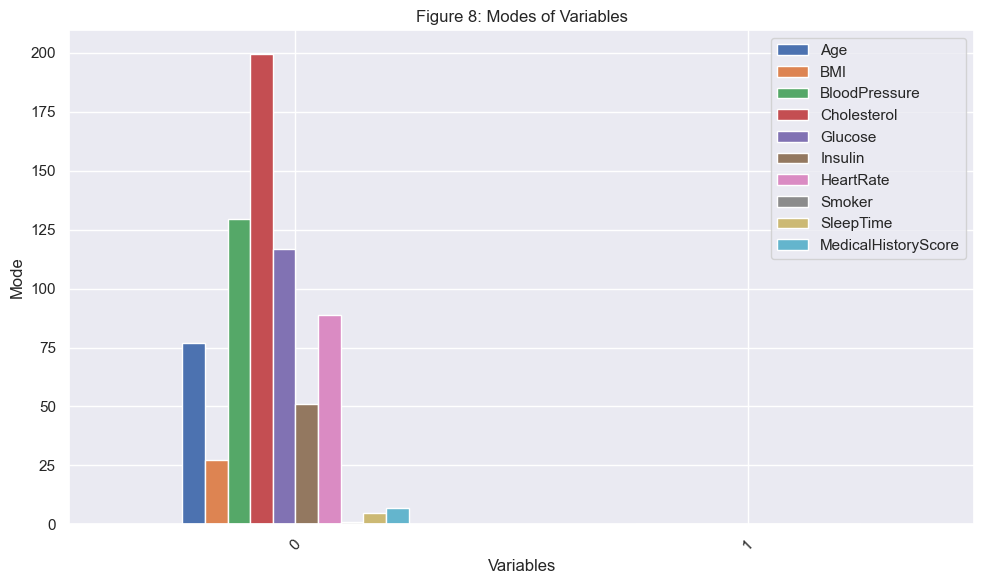

In [58]:
modes.plot(kind='bar', figsize=(10, 6))
plt.title('Figure 8: Modes of Variables')
plt.xlabel('Variables')
plt.ylabel('Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
column_names = healthcare_data.columns.tolist()
print(column_names)

['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'Smoker', 'PhysicalActivity', 'SleepTime', 'MedicalHistoryScore', 'IncomeLevel', 'StressLevel', 'HealthIns', 'Disease_Encoded']


In [60]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

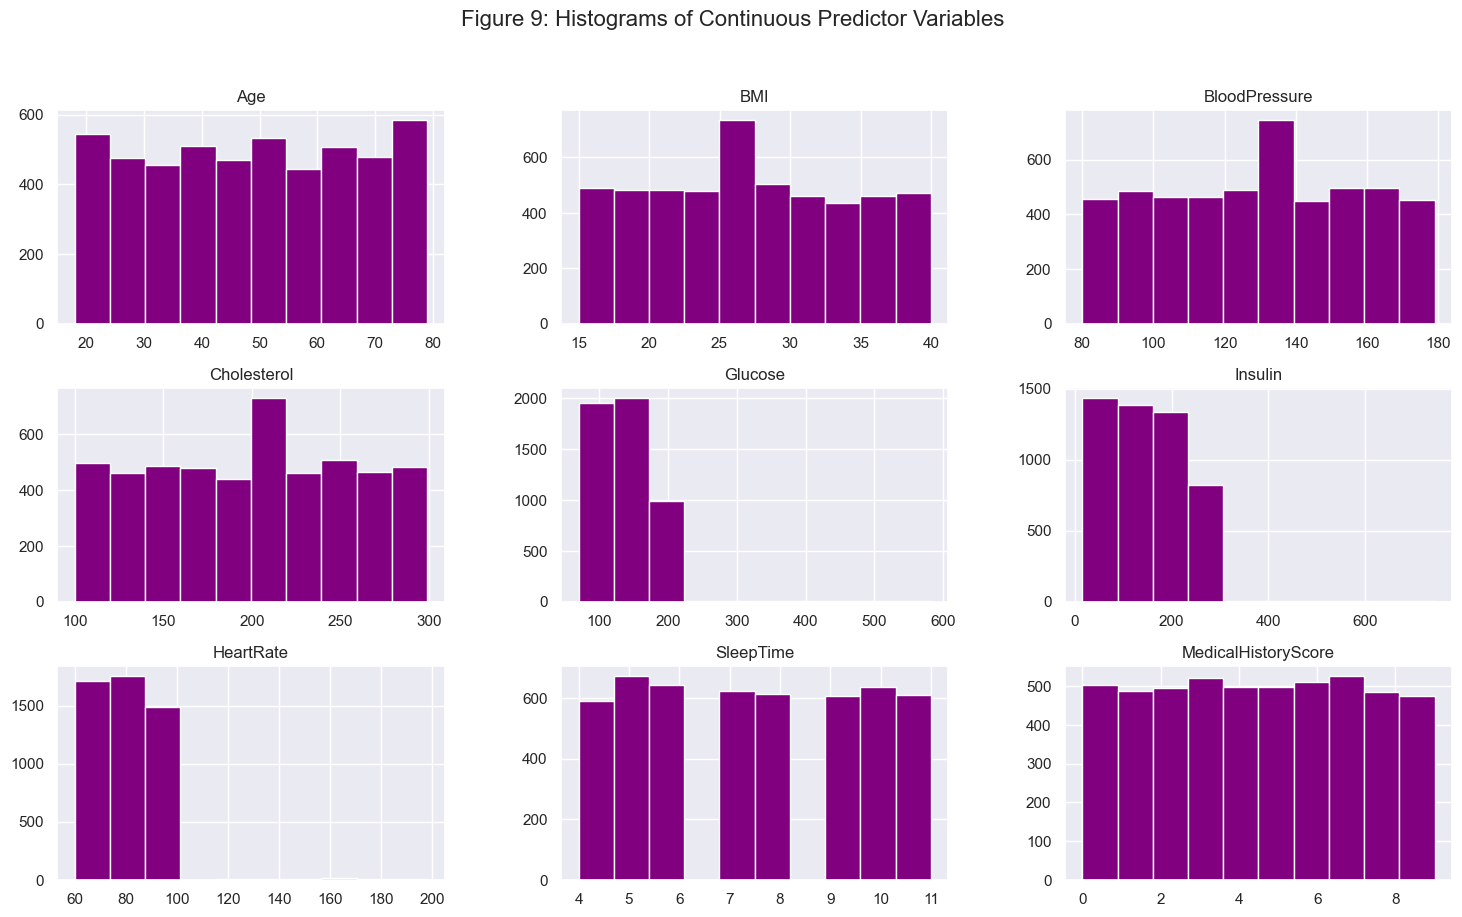

In [61]:
healthcare_data.hist(['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore'], figsize=(18, 10), color='purple')
plt.suptitle('Figure 9: Histograms of Continuous Predictor Variables', fontsize=16)
plt.show()

In [ ]:
pip install statistics

mean = np.mean(healthcare_data)
mean

median = np.median(healthcare_data)
median

mode = stats.mode(healthcare_data)
mode

## Training and Test:

In [ ]:
X = healthcare_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].values
y = healthcare_data.iloc[:, 14].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y

### Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [ ]:
healthcare_data.shape

# LDA
#### Reduce the dimensionality:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X,y)

In [ ]:
X_lda.shape

In [ ]:
import numpy as np

classes = np.unique(y)
num_classes = len(classes)

print("number of classes:", num_classes)
print("Classes:", classes)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

colors = ['Purple', 'Purple', 'pink', 'yellow']

custom_cmap = ListedColormap(colors)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(x=X_lda[:, 0],
           y=X_lda[:, 1],
           c=y,
           cmap=custom_cmap, 
           alpha=0.7,
           edgecolors='b')

plt.title('Figure 10: Scatter Plot', fontsize=14)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

n_train = 2000  
n_test = 400  
n_averages = 50  
n_features_max = 50  
step = 4 


def generate_data(n_samples, n_features):
    X, y = make_blobs(n_samples=n_samples, n_features=4, centers=[[-2], [2]])

    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5).fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

with plt.style.context('seaborn-talk'):
    plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
             label="LDA with shrinkage", color='navy')
    plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
             label="LDA", color='Purple')

    plt.xlabel('Figure 8: n_features / n_samples')
    plt.ylabel('Classification accuracy')
    plt.legend(prop={'size': 15})
    plt.tight_layout()

## Superviser Learning

# PCA:

In [ ]:
healthcare_data_no_label=healthcare_data.drop(columns=['Disease_Encoded'])

In [ ]:
healthcare_data_no_label.head()

In [ ]:
pca = PCA().fit(healthcare_data_no_label)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Figure 9: Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
pca = PCA(6)

In [ ]:
projected = pca.fit_transform(healthcare_data_no_label)

In [ ]:
projected.shape

In [ ]:
projected

In [ ]:
healthcare_data_pca = pd.DataFrame(projected, columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6'])

In [ ]:
healthcare_data_pca.head()

In [ ]:
healthcare_data_pca['Disease_Encoded']=healthcare_data['Disease_Encoded']

In [ ]:
healthcare_data_pca.head()

In [ ]:
healthcare_data_array = healthcare_data_pca.values

In [ ]:
healthcare_data_array

In [ ]:
from sklearn.model_selection import train_test_split
X = healthcare_data_array[:,0:6]
y = healthcare_data_array[:,6]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Figure 10: Algorithm Comparison')
pyplot.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = ["purple", "yellow", "grey", "pink"]

sns.scatterplot(data=healthcare_data_pca, x='C5', y='C6', hue='Disease_Encoded', palette=custom_palette)

plt.title('Figure 11: Scatterplot of two first main components')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = ["purple", "yellow", "grey", "pink"]

sns.scatterplot(data=healthcare_data_pca, x='C5', y='C1', hue='Disease_Encoded', palette=custom_palette)

plt.title('Figure 12: Scatterplot of two first main components')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["purple", "yellow", "grey", "pink"]

sns.scatterplot(data=healthcare_data_pca, x='C4', y='C5', hue='Disease_Encoded', palette=custom_palette)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Figure 13: Scatterplot of the Two First Principal Components')
plt.show()

## Classification:

#### Splitting into set 10%

In [ ]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 102)

In [ ]:
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

In [ ]:
from sklearn.naive_bayes import GaussianNB

nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

In [ ]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

In [ ]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:]

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

custom_palette = sns.color_palette("Purples", as_cmap=True)

ax = sns.heatmap(cm, annot=True, cmap=custom_palette)

ax.set_title('Figure 18: Confusion Matrix')

plt.show()

print(cm, cm.shape)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean()

In [ ]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 19: Cross Validation Score vs Number of Folds')
plt.plot(list)

#### Splitting into set 20%

In [ ]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 102)

In [ ]:
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

In [ ]:
from sklearn.naive_bayes import GaussianNB

nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

In [ ]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

In [ ]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:]

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

custom_palette = sns.color_palette("Purples", as_cmap=True)

heatmap = sns.heatmap(cm, annot=True, cmap=custom_palette)

heatmap.set_title('Figure 20: Confusion Matrix')

plt.show()

print(cm, cm.shape)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean()

In [ ]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 21: Cross Validation Score vs Number of Folds')
plt.plot(list)

#### Splitting into set 30%

In [ ]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 102)

In [ ]:
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

In [ ]:
from sklearn.naive_bayes import GaussianNB

nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

In [ ]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

In [ ]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:]

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

### Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

custom_palette = sns.color_palette("Purples", as_cmap=True)

sns.heatmap(cm, annot=True, cmap=custom_palette)
plt.title('Figure 22: Confusion Matrix')

plt.show()

print(cm, cm.shape)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean()

In [ ]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 23: Cross Validation Accuracy vs Number of Folds')
plt.plot(list)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

models_importances = {"Modelo 1": [0.1, 0.2, 0.15, 0.18, 0.25, 0.12, 0.05, 0.08, 0.17]}

index = ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore']

plt.figure(figsize=(10, 6))
for model, importances in models_importances.items():
    feature_importances = pd.Series(importances, index=index)
    feature_importances.plot(kind='barh', label=model, alpha=0.8, color='purple')  

plt.title('Figure 24: Feature Importances for Each Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.grid(True)
plt.show()

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [ ]:
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

print(clf)

In [ ]:
LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

### Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

In [ ]:
LOG.classes_

In [ ]:
mapping = {0:'Disease_A', 1:'Disease_B', 2:'Disease_C', 3:'Disease_Unknown'}
classesMapped = [mapping.get(value, value) for value in clf.classes_]
classesMapped

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for Logistic Regression:\n{cm}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title("Figure 25: Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())
plt.title('Figure 26: Cross Validation Accuracy vs Number of Folds')
plt.plot(list)

In [ ]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

In [ ]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### Splitting into set 20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

print(clf)

In [ ]:
LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

### Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

In [ ]:
LOG.classes_

In [ ]:
mapping = {0:'Disease_A', 1:'Disease_B', 2:'Disease_C', 3:'Disease_Unknown'}
classesMapped = [mapping.get(value, value) for value in clf.classes_]
classesMapped

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for Logistic Regression:\n{cm}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title("Figure 27: Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 28: Cross Validation Accuracy vs Number of Folds')
plt.plot(list)

In [ ]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

In [ ]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### Splitting into set 30%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

print(clf)

In [ ]:
LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

### Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

In [ ]:
LOG.classes_

In [ ]:
mapping = {0:'Disease_A', 1:'Disease_B', 2:'Disease_C', 3:'Disease_Unknown'}
classesMapped = [mapping.get(value, value) for value in clf.classes_]
classesMapped

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for Logistic Regression:\n{cm}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title("Figure 29: Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 30: Cross Validation Accuracy vs Number of Folds')
plt.plot(list)

In [ ]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

In [ ]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Random Forest

#### Splitting into set 10%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [ ]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 1000)

clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

In [ ]:
X = healthcare_data.drop('Disease_Encoded',axis=1)

y = healthcare_data['Disease_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Confusion Matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}")
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Purples')
    plt.title(f" Figure 31: Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

#### Default Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_test,predictions))

### Confusion Matrix

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

custom_palette = sns.color_palette("Purples", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap=custom_palette, fmt='g')
plt.title('Figure 32: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(accuracy_score(y_test,predictions))

### Hyperparameter Tuning

#### Tuning max_depth

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_depth': range(2, 20, 5)}   

rf = RandomForestClassifier()


rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend('Accuracy')

plt.title("Figure 33: Accuracy vs. max_depth")

plt.show()

#### Grid Search to Find Optimal Hyperparameters

In [ ]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),   # based on the records, on this case it has 3000
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]     #number of columns
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

#### Splitting into set 20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 1000)

clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

#### Splitting into set 30%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 1000)

clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

### Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 4)

kNN.fit(X_train, y_train)

y_pred = kNN.predict(X_test)

In [ ]:
from sklearn import metrics

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_predict = kNN.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, cmap='Purples')

plt.title('Figure 34: Confusion Matrix')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
healthcare_data.columns

In [ ]:
feature_cols = ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Smoker', 'Glucose', 'Insulin',
       'HeartRate', 'PhysicalActivity', 'SleepTime',
       'MedicalHistoryScore', 'IncomeLevel', 'StressLevel', 'HealthIns']
X = healthcare_data[feature_cols]
y = healthcare_data.Disease_Encoded

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='gini', max_depth = 4, random_state = 0)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

In [ ]:
X.columns.tolist()

In [ ]:
healthcare_data['Disease_Encoded'].unique().tolist()

In [ ]:
plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=[str(label) for label in healthcare_data['Disease_Encoded'].unique()], rounded=True, fontsize=10)
plt.title('Figure 35: Decision Tree Visualization')
plt.show()

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_predict = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Figure 36: Confusion Matrix')
plt.show()

report = classification_report(y_test, y_predict)
print("Classification Report:")
print(report)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier()

DTree.fit(X_train, y_train)

y_pred = DTree.predict(X_test)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

index = ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore']

values = [0.1, 0.2, 0.15, 0.18, 0.25, 0.12, 0.05, 0.08, 0.17]

feature_importances = pd.Series(values, index=index)

plt.figure(figsize=(8, 6))
feature_importances.plot(kind='barh', title='Figure 37: Feature Importances', grid=True, color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### SVC

In [ ]:
healthcare_data.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

### Model Evaluation

### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Purples')

plt.title('Figure 38: Confusion Matrix')
plt.xlabel('Predicted Amount')
plt.ylabel('Actual Value')
plt.show()

print(classification_report(y_test, y_predict))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, verbose=4)
grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)

grid_predictions = grid_search.predict(X_test_scaled)

cm = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cm, annot=True)

print("Figure 21: Classification Report:")
print(classification_report(y_test, grid_predictions))

In [ ]:
# SMOTE: Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.
from collections import Counter
from imblearn.over_sampling import SMOTE 

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
# find best hyper parameters
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Artificial Neural Networks

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
import numpy as np
import random
import tensorflow
tensorflow.random.set_seed(16)
np.random.seed(1)
random.seed(1)

In [ ]:
from keras.models import Sequential
model = Sequential()

In [ ]:
from keras.layers import Dense

model.add(Dense(32, activation = 'relu', input_dim = 14))

In [ ]:
model.add(Dense(16, activation = 'relu'))

In [ ]:
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 200)  

In [ ]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predicting the test set results using your neural network model
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='Purples')

plt.title('Figure 38: Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Printing the classification report
print(classification_report(y_test, y_test_pred))

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

def unsupervised_learning(data, n_clusters=2, title=''):
    X = data.drop(columns=['Disease_Encoded'])

    kmeans = KMeans(n_clusters=n_clusters)

    kmeans.fit(X)

    data['Cluster'] = kmeans.labels_

    sns.pairplot(data, hue='Cluster', palette='Purples', vars=X.columns)
    plt.title('Figure 40: Pairplot of Clusters')  
    plt.show()

    return data

healthcare_data_clustered = unsupervised_learning(healthcare_data, title='Pairplot of Clusters')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram(data, column, bins=10):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, bins=bins, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
sns.histplot(healthcare_data['Age'], bins=20, color='Purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Figure 41: Histogram of Age')
plt.show()

In [ ]:
ax = sns.histplot(healthcare_data.Disease_Encoded, kde = True, color = 'Purple')
ax.set(xlabel = 'Disease', ylabel = 'Count', title = 'Figure 42: Disease Histogram')

In [ ]:
plt.hexbin(healthcare_data['SleepTime'], healthcare_data['SleepTime'], gridsize=15, cmap="Purples")
plt.title('Figure 43: SleepTime Distribution')

In [ ]:
plt.hexbin(healthcare_data['Cholesterol'], healthcare_data['Cholesterol'], gridsize=15, cmap="Purples")
plt.title('Figure 44: Cholesterol Distribution')

In [ ]:
plt.hexbin(healthcare_data['Glucose'], healthcare_data['Glucose'], gridsize=15, cmap="Purples")
plt.title('Figure 45: Glucose Distribution')

In [ ]:
plt.hexbin(healthcare_data['Insulin'], healthcare_data['Insulin'], gridsize=15, cmap="Purples")
plt.title('Figure 46: Insulin Distribution')

In [ ]:
plt.hexbin(healthcare_data['HeartRate'], healthcare_data['HeartRate'], gridsize=15, cmap="Purples")
plt.title('Figure 47: HeartRate Distribution')

In [ ]:
plt.hexbin(healthcare_data['Age'], healthcare_data['Age'], gridsize=15, cmap="Purples")
plt.title('Figure 48: Age Distribution')

In [ ]:
plt.hexbin(healthcare_data['BloodPressure'], healthcare_data['BloodPressure'], gridsize=15, cmap="Purples")
plt.title('Figure 49: BloodPressure Distribution')

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(healthcare_data.corr(), annot=True, cmap='Purples', fmt='.2f')
plt.title('Figure 52: Correlation Heatmap')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

size_columns = healthcare_data.head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x='Disease_Encoded', y='StressLevel', data=size_columns, palette=['pink', 'grey', 'Purple', 'yellow'])
plt.title('Figure 53: Distribution of Disease vs StressLevel for the First 30 Rows')
plt.xlabel('Disease')
plt.ylabel('StressLevel')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

size_columns = healthcare_data.head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x='Disease_Encoded', y='SleepTime', data=size_columns, palette=['pink', 'grey', 'Purple', 'yellow'])
plt.title('Figure 54:  Distribution of SleepTime vs Disease for the First 30 Rows')
plt.xlabel('Disease')
plt.ylabel('SleepTime')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

size_columns = healthcare_data.head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x='Disease_Encoded', y='PhysicalActivity', data=size_columns, palette=['pink', 'grey', 'Purple', 'yellow'])
plt.title('Figure 55:  Distribution of PhysicalActivity vs Disease for the First 30 Rows')
plt.xlabel('Disease')
plt.ylabel('PhysicalActivity')
plt.show()

In [ ]:
sns.displot(healthcare_data['BMI'], color='Purple')

plt.title('Figure 56: BMI')
plt.show()

In [ ]:
sns.displot(healthcare_data['Cholesterol'], color='Purple')

plt.title('Figure 57: Cholesterol')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

sizes = healthcare_data['Disease_Encoded'].value_counts()

plt.figure(figsize=(4, 4))
sizes.plot(kind='pie', autopct='%1.1f%%',  colors=['pink', 'yellow', 'grey', 'Purple'])

plt.title('Figure 58: Disease Distribution')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

sizes = healthcare_data['Smoker'].value_counts()

plt.figure(figsize=(4, 4))
sizes.plot(kind='pie', autopct='%1.1f%%', colors=['Purple', 'grey'])

plt.title('Figure 59: Smoker Distribution')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

sizes = healthcare_data['StressLevel'].value_counts()

plt.figure(figsize=(4, 4))
sizes.plot(kind='pie', autopct='%1.1f%%', colors=['Purple', 'grey', 'pink'])

plt.title('Figure 60: StressLevel Distribution')

plt.show()

### Unsuperviser Learning

### K-means Clustering:

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = healthcare_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].values
y = healthcare_data.iloc[:, 14].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
columns_to_cluster = [
                 'Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 
                 'HeartRate', 'Smoker', 'PhysicalActivity', 'SleepTime', 'MedicalHistoryScore',
                 'IncomeLevel', 'StressLevel', 'HealthIns'
]
subset = healthcare_data[columns_to_cluster]

In [ ]:
scaler = StandardScaler()

subset_scaled = scaler.fit_transform(subset)

kmeans = KMeans(n_clusters=5, max_iter=50, random_state=42)
kmeans.fit(subset_scaled)

labels = kmeans.labels_

In [ ]:
healthcare_data['Cluster'] = kmeans.labels_
print(healthcare_data.head())

In [ ]:
cluster_summary = healthcare_data.groupby('Cluster').mean()
print(cluster_summary)

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=50, random_state=42)
kmeans.fit(subset_scaled)

In [ ]:
ssd = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(subset_scaled)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), ssd, linewidth=2, color="purple", marker="8")
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("SSD")
plt.title("Figure 14: Elbow Curve", fontsize=20, color="black")

plt.grid(True)

plt.show()

In [ ]:
print(healthcare_data.head())

print("Inertia:", kmeans.inertia_)

print("Cluster Centers:", kmeans.cluster_centers_)

In [ ]:
import matplotlib.pyplot as plt

X_varied = healthcare_data[['BMI', 'Cholesterol']].values

y_pred = kmeans.labels_

colors = ['yellow', 'purple', 'pink']

for cluster_id, color in zip(range(3), colors):
    plt.scatter(X_varied[y_pred == cluster_id, 0], X_varied[y_pred == cluster_id, 1], color=color)

plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Figure 15: Scatter plot with colored clusters")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

healthcare_data['Cluster'] = kmeans.labels_

scatter_data = pd.DataFrame({
    'Age': healthcare_data['Age'],
    'BloodPressure': healthcare_data['BloodPressure'],
    'HeartRate': healthcare_data['HeartRate'],
    'Smoker': healthcare_data['Smoker'],
    'PhysicalActivity': healthcare_data['PhysicalActivity'],
    'SleepTime': healthcare_data['SleepTime'],
    'MedicalHistoryScore': healthcare_data['MedicalHistoryScore'],
    'StressLevel': healthcare_data['StressLevel'],
    'HealthIns': healthcare_data['HealthIns'],
    'Disease_Encoded': healthcare_data['Disease_Encoded'],
    'Cluster': healthcare_data['Cluster']
})

fig = px.scatter_3d(scatter_data, 
                    x='Age', 
                    y='BloodPressure', 
                    z='HeartRate', 
                    color='Cluster', 
                    color_continuous_scale='purples',  
                    title='Figure 16: 3D Cluster Scatter Plot')

fig.update_traces(marker=dict(size=5))

fig.update_layout(height=600, width=800)

fig.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = healthcare_data['Disease_Encoded']
y = healthcare_data['HealthIns']
z = healthcare_data['BloodPressure']

labels = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in set(labels):
    indices = labels == label
    ax.scatter(x[indices], y[indices], z[indices], label=f'Cluster {label}', alpha=0.6)

ax.set_xlabel('Disease_Encoded')
ax.set_ylabel('HealthIns')
ax.set_zlabel('BloodPressure')

plt.legend()
plt.title('Figure 17: 3D Cluster Graph with Total_Trans_Amt, Credit_Limit, and Income_Category_Numeric')
plt.show()

### Comparison of ML modelling outcomes using a Table or graph visualisation. 

In [ ]:

from sklearn.metrics import classification_report, accuracy_score

svc = SVC()
log_reg = LogisticRegression()
rfc = RandomForestClassifier()

models = [svc, log_reg, rfc]
model_names = ['SVC', 'Logistic Regression', 'Random Forest Classifier']

metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

for model, name in zip(models, model_names):
    # Treinamento
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    metrics_dict['Model'].append(name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1-score'].append(f1_score)

metrics_df = pd.DataFrame(metrics_dict)

print(metrics_df)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color=['Purple', 'grey', 'pink'])

plt.title('Figure 61: Accuracy by Model', size=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Modelos adicionais a serem incluídos
additional_models = ['Artificial Neural Networks', 'Decision Tree', 'KNN']

# Valores de precisão para os modelos adicionais (definidos como 0 para este exemplo)
additional_accuracies = [0, 0, 0]

# Cores para os novos modelos
additional_colors = ['blue', 'green', 'orange']

plt.figure(figsize=(8, 6))

# Gráfico de barras para os modelos existentes
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color=['Purple', 'grey', 'pink'])

# Adicionando barras para os novos modelos
for i, model in enumerate(additional_models):
    plt.bar(model, additional_accuracies[i], color=additional_colors[i])

plt.title('Figure 61: Accuracy by Model', size=16)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_values = metrics_df['Accuracy']
precision_values = metrics_df['Precision']
recall_values = metrics_df['Recall']

bar_width = 0.2

index = np.arange(len(metrics_df['Model']))

plt.figure(figsize=(10, 6))

plt.bar(index, accuracy_values, bar_width, label='Accuracy',  color='Purple')
plt.bar(index + bar_width, precision_values, bar_width, label='Precision',  color='pink')
plt.bar(index + 2*bar_width, recall_values, bar_width, label='Recall',  color='grey')

plt.title('Figure 62: Performance Metrics by Model', size=16)
plt.xlabel('Models', size=14)
plt.ylabel('Score', size=14)
plt.xticks(index + bar_width, metrics_df['Model'])
plt.legend()

plt.show()

## Statistical summary and short inferences:

In [ ]:
import scipy.stats as stats

def plot_qq(column):
    data = healthcare_data[column].dropna()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f' Figure : Q-Q Plot to Check Normality of {column}')
    plt.show()

plot_qq('Age')

In [ ]:
import scipy.stats as stats

def plot_qq(column):
    data = healthcare_data[column].dropna()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Figure : Q-Q Plot to Check Normality of {column}')
    plt.show()

plot_qq('HeartRate')

In [ ]:
import scipy.stats as stats

def plot_qq(column):
    data = healthcare_data[column].dropna()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Figure : Q-Q Plot to Check Normality of {column}')
    plt.show()

plot_qq('BMI')

### Why has been selected those variables?
#### I have choose categoricals variables because the continuous would be hard to understand a pattern of probability of who has a type of Disease and at the same time Health Insurance.

HealthIns 0 represents Yes and 1 No.
Disease A = 0
Disease B = 1
Disease C = 2
Disease D = 3

In [ ]:
import statistics as stats
from scipy.stats import binom

In [ ]:
cross_tab = pd.crosstab(index=healthcare_data['Smoker'], columns=healthcare_data['HealthIns'])

print(cross_tab)

### Who has the Insurance and Non Smoker?

In [ ]:
(1270 / 2506)

In [ ]:
binom.cdf(k =50 , n = 100  , p = 0.5067) 

### Calculating probability between 70 and 100 inclusive, it was substract from P(x=<100) - P(x=<29):

In [ ]:
binom.cdf(k =70 , n = 100 , p = 0.5067) - binom.cdf(k =29 , n = 100 , p = 0.5067)

### Calculate probability between 50 and 80 inclusive, it was substract from P(x=<80) - P(x=<49):

In [ ]:
binom.cdf(k =80 , n = 100 , p = 0.5067) - binom.cdf(k =49 , n = 100 , p = 0.5067)

### Probabilities Disease_Encoded and Smoker

In [ ]:
cross_tab = pd.crosstab(index=healthcare_data['Disease_Encoded'], columns=healthcare_data['Smoker'])

print(cross_tab)

### Who is Smoker and has the Disease 2?

In [ ]:
( 627 / 2448)

### Calculating probability between 50 and 150 inclusive, it was substract from P(x=<150) - P(x=<49):

In [ ]:
binom.cdf(k =150 , n = 200 , p = 0.2561) - binom.cdf(k =49 , n = 200 , p = 0.2561)

### Calculating probability between 50 and 100 inclusive, it was substract from P(x=<100) - P(x=<49):

In [ ]:
binom.cdf(k =100 , n = 200 , p = 0.2561) - binom.cdf(k =49 , n = 200 , p = 0.2561)

### Normal Distribution BMI

In [ ]:
BMI_description = healthcare_data['BMI'].describe()

BMI_description

In [ ]:
from scipy.stats import norm

µ = mu
σ = sigma

In [ ]:
mu = 27.33            
sigma = 7.00

In [ ]:
norm.cdf(20, mu, sigma)

#### Calculate the BMI  than 20 points --> P(x < 20):

In [ ]:
norm.cdf(20, mu, sigma)

#### We calculate of BMI be greater than 20 points --> P(X > 20):

In [ ]:
norm.sf(20, mu, sigma)

#### Calculate between 20 and 25 points --> P(x<20) - P(x<25):

In [ ]:
norm.cdf(25, mu, sigma) - norm.cdf(20, mu, sigma)

In [ ]:
x = np.linspace(0, 100, 500)       

pdf_values = norm.pdf(x, mu, sigma)

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(x, pdf_values, label = 'Customer_Satisfaction_Score', color = 'blue')


plt.fill_between(x, pdf_values, where = (x<40), color = 'red', alpha = 0.05, label = 'X <40')

plt.title('BMI')
plt.xlabel('Figure : X<80')
plt.ylabel('Probabilities of BMI')
plt.grid(True)
plt.show()

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [ ]:
column_names = healthcare_data.columns.tolist()
print(column_names)

In [ ]:
from scipy.stats import f_oneway

def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):

    SelectedPredictors=[]
    
    print('ANOVA:\n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists = [inpData[inpData[TargetVariable] == category][predictor] for category in inpData[TargetVariable].unique()]
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1] < 0.05):            #(assuming that p_value is smaler than 0.05)
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'Not correlated with: ', TargetVariable, '| P-Value:', AnovaResults[1])
    return SelectedPredictors

In [ ]:
ContinuousVariables=['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore']
FunctionAnova(inpData=healthcare_data, TargetVariable='Disease_Encoded', ContinuousPredictorList=ContinuousVariables)

Although some of the independent variables have a normal distribution, they do not have a significant correlation of variance, as all the p_values are greater than the significance level of 0.05. This therefore suggests that there is no strong significant impact/influence associated with the types of Diseases.

### Hypothesis:

In [ ]:
healthcare_data.describe()

### BloodPressure:

In [ ]:
from statsmodels.stats import weightstats

X = healthcare_data['BloodPressure']
mu = 125

In [ ]:
z_score, p_value = weightstats.ztest(X, value = mu, ddof = 1, alternative = 'two-sided')
z_score

#### As I know the Sigma the std of the population, then we can go through with the Degrees of freedom:

#### H0: mu = 125 // H1: mu > 125
#### mu = 25 (defining the population average)

In [ ]:
p_value

As the p_value is greater than alpha(0.05%) we do not reject the Null Hypothesis. We are firming that at a 5% of significance level, we have evidence to say that the average of BloodPressure is around 125

### Cholesterol

Creating a hypothesis test for CHolesterol and creating a scenario that the average is greater than 160:

H0: mu = 160 // H1: mu > 160

In [ ]:
mu1 = 160

In [ ]:
z_score1, p_value1 = weightstats.ztest(X, value = mu1, ddof = 1, alternative = 'larger')
z_score1

In [ ]:
p_value1

we accept the Null Hypothesis because the p_value is greater than alpha

### Blood Pressure:

#### Creating a scenario that we wanna know if the BloodPressure average of the population is around 100

In [ ]:
from scipy import stats

mu2 = 100

In [ ]:
t_score, p_value2 = stats.ttest_1samp(X, mu2)
t_score

In [ ]:
p_value2 

#### At a 5% of significance level we have enough results that the average is smaler than alpha, so we reject the Null hypoteshis

In [ ]:
# correlacao
# submit
# adicionar t-test and hyper on WORD